In [99]:
import pandas as pd

In [100]:
M = pd.read_csv("scaffold_median_AUC_Moshkov.csv")
M

assay_id       auc         descriptor  auc_50  auc_70  auc_90
0         1_1  0.452381  late_fusion_cs_ge   False   False   False
1       10_19  0.523810  late_fusion_cs_ge    True   False   False
2       10_20  0.370192  late_fusion_cs_ge   False   False   False
3     100_277  0.833333  late_fusion_cs_ge    True    True   False
4     100_278  0.642857  late_fusion_cs_ge    True   False   False
...       ...       ...                ...     ...     ...     ...
4585     9_18  0.000000           mo_es_op   False   False   False
4586   90_256  0.357143           mo_es_op   False   False   False
4587   91_257  0.833333           mo_es_op    True    True   False
4588   92_258  0.875000           mo_es_op    True    True   False
4589   93_259  0.646465           mo_es_op    True   False   False

[4590 rows x 6 columns]

In [101]:
M.assay_id.nunique()

270

In [102]:
S = pd.read_csv("RF_scaffold_median_AUCSeal.csv")
S

Unnamed: 0     Task       AUC
0             0  100_277  0.800000
1             1  100_278  0.833333
2             2  104_289  0.801282
3             3  104_291  0.884615
4             4  104_295  0.857143
..          ...      ...       ...
265         265   92_258  0.809524
266         266   93_259  0.562500
267         267     9_14  0.500000
268         268     9_17  1.000000
269         269     9_18  0.500000

[270 rows x 3 columns]

In [103]:
S["descriptor"] = "cell_count"
S = S.rename(columns = {"Task": "assay_id", "AUC": "auc"})
S = S[["assay_id", "auc", "descriptor"]]
S["auc_50"]= S["auc"]>0.5
S["auc_70"]= S["auc"]>0.7
S["auc_90"]= S["auc"]>0.9
S

assay_id       auc  descriptor  auc_50  auc_70  auc_90
0    100_277  0.800000  cell_count    True    True   False
1    100_278  0.833333  cell_count    True    True   False
2    104_289  0.801282  cell_count    True    True   False
3    104_291  0.884615  cell_count    True    True   False
4    104_295  0.857143  cell_count    True    True   False
..       ...       ...         ...     ...     ...     ...
265   92_258  0.809524  cell_count    True    True   False
266   93_259  0.562500  cell_count    True   False   False
267     9_14  0.500000  cell_count   False   False   False
268     9_17  1.000000  cell_count    True    True    True
269     9_18  0.500000  cell_count   False   False   False

[270 rows x 6 columns]

In [104]:
S[S["auc"]==1]

assay_id  auc  descriptor  auc_50  auc_70  auc_90
6    104_299  1.0  cell_count    True    True    True
9    104_323  1.0  cell_count    True    True    True
33   110_396  1.0  cell_count    True    True    True
41   113_407  1.0  cell_count    True    True    True
64   134_476  1.0  cell_count    True    True    True
73     15_26  1.0  cell_count    True    True    True
131  200_658  1.0  cell_count    True    True    True
229   42_103  1.0  cell_count    True    True    True
232   46_120  1.0  cell_count    True    True    True
239      6_7  1.0  cell_count    True    True    True
268     9_17  1.0  cell_count    True    True    True

In [105]:
len(S[S["auc"]==1])

11

In [106]:
df_dataset= pd.concat([S, M]).reset_index(drop=True)
df_dataset

assay_id       auc  descriptor  auc_50  auc_70  auc_90
0     100_277  0.800000  cell_count    True    True   False
1     100_278  0.833333  cell_count    True    True   False
2     104_289  0.801282  cell_count    True    True   False
3     104_291  0.884615  cell_count    True    True   False
4     104_295  0.857143  cell_count    True    True   False
...       ...       ...         ...     ...     ...     ...
4855     9_18  0.000000    mo_es_op   False   False   False
4856   90_256  0.357143    mo_es_op   False   False   False
4857   91_257  0.833333    mo_es_op    True    True   False
4858   92_258  0.875000    mo_es_op    True    True   False
4859   93_259  0.646465    mo_es_op    True   False   False

[4860 rows x 6 columns]

In [107]:
df_dataset.descriptor.value_counts()

cell_count                270
late_fusion_cs_ge         270
mo_cp_es_op               270
mobc_es_op                270
mobc_cp_es_op             270
ge_mo_es_op               270
ge_mo_cp_es_op            270
ge_mobc_es_op             270
ge_mobc_cp_es_op          270
ge_es_op                  270
ge_cp_es_op               270
ges_es_op                 270
cp_es_op                  270
cpcl_es_op                270
late_fusion_ge_mobc       270
late_fusion_cs_mobc       270
late_fusion_cs_ge_mobc    270
mo_es_op                  270
Name: descriptor, dtype: int64

In [108]:
df_dataset.groupby("descriptor").mean()

auc    auc_50    auc_70    auc_90
descriptor                                                    
cell_count              0.632020  0.759259  0.355556  0.092593
cp_es_op                0.609376  0.718519  0.377778  0.059259
cpcl_es_op              0.592956  0.692593  0.325926  0.085185
ge_cp_es_op             0.579067  0.674074  0.274074  0.051852
ge_es_op                0.587393  0.696296  0.262963  0.070370
ge_mo_cp_es_op          0.647160  0.688889  0.370370  0.074074
ge_mo_es_op             0.648553  0.670370  0.366667  0.066667
ge_mobc_cp_es_op        0.586749  0.729630  0.262963  0.062963
ge_mobc_es_op           0.596799  0.722222  0.277778  0.077778
ges_es_op               0.579238  0.677778  0.262963  0.066667
late_fusion_cs_ge       0.637965  0.762963  0.403704  0.066667
late_fusion_cs_ge_mobc  0.653866  0.759259  0.433333  0.103704
late_fusion_cs_mobc     0.643734  0.755556  0.459259  0.114815
late_fusion_ge_mobc     0.648408  0.781481  0.400000  0.103704
mo_cp_es_op             0.644339  0.681481  0.400000  0.081481
mo_es_op                0.652217  0.803704  0.444444  0.096296
mobc_cp_es_op           0.612134  0.737037  0.411111  0.062963
mobc_es_op              0.626387  0.729630  0.377778  0.103704

In [109]:
df_dataset.groupby("descriptor").mean()*270

auc  auc_50  auc_70  auc_90
descriptor                                                
cell_count              170.645369   205.0    96.0    25.0
cp_es_op                164.531479   194.0   102.0    16.0
cpcl_es_op              160.098113   187.0    88.0    23.0
ge_cp_es_op             156.348064   182.0    74.0    14.0
ge_es_op                158.596186   188.0    71.0    19.0
ge_mo_cp_es_op          174.733148   186.0   100.0    20.0
ge_mo_es_op             175.109334   181.0    99.0    18.0
ge_mobc_cp_es_op        158.422276   197.0    71.0    17.0
ge_mobc_es_op           161.135854   195.0    75.0    21.0
ges_es_op               156.394349   183.0    71.0    18.0
late_fusion_cs_ge       172.250467   206.0   109.0    18.0
late_fusion_cs_ge_mobc  176.543915   205.0   117.0    28.0
late_fusion_cs_mobc     173.808180   204.0   124.0    31.0
late_fusion_ge_mobc     175.070090   211.0   108.0    28.0
mo_cp_es_op             173.971398   184.0   108.0    22.0
mo_es_op                176.098472   217.0   120.0    26.0
mobc_cp_es_op           165.276183   199.0   111.0    17.0
mobc_es_op              169.124536   197.0   102.0    28.0

In [110]:
df_dataset.groupby("descriptor").std()

auc    auc_50    auc_70    auc_90
descriptor                                                    
cell_count              0.197933  0.428327  0.479570  0.290399
cp_es_op                0.223072  0.450557  0.485732  0.236548
cpcl_es_op              0.235600  0.462277  0.469590  0.279675
ge_cp_es_op             0.213648  0.469590  0.446875  0.222140
ge_es_op                0.195884  0.460710  0.441060  0.256245
ge_mo_cp_es_op          0.208778  0.463808  0.483801  0.262378
ge_mo_es_op             0.202589  0.470952  0.482789  0.249907
ge_mobc_cp_es_op        0.215371  0.444976  0.441060  0.243347
ge_mobc_es_op           0.196893  0.448735  0.448735  0.268319
ges_es_op               0.219155  0.468195  0.441060  0.249907
late_fusion_cs_ge       0.195494  0.426055  0.491551  0.249907
late_fusion_cs_ge_mobc  0.207999  0.428327  0.496456  0.305442
late_fusion_cs_mobc     0.232185  0.430555  0.499263  0.319390
late_fusion_ge_mobc     0.201650  0.414008  0.490808  0.305442
mo_cp_es_op             0.218098  0.466767  0.490808  0.274081
mo_es_op                0.217053  0.397933  0.497827  0.295545
mobc_cp_es_op           0.229117  0.441060  0.492949  0.243347
mobc_es_op              0.223518  0.444976  0.485732  0.305442

In [111]:
df_dataset.groupby("descriptor").mean().to_csv("mean_Auc_moshkov")

In [112]:
df_dataset.groupby("descriptor").std().to_csv("std_Auc_moshkov")

In [113]:
df_dataset["auc_1"] = df_dataset["auc"]==1
df_dataset["auc_80"] = df_dataset["auc"]>=0.80
df_dataset

assay_id       auc  descriptor  auc_50  auc_70  auc_90  auc_1  auc_80
0     100_277  0.800000  cell_count    True    True   False  False    True
1     100_278  0.833333  cell_count    True    True   False  False    True
2     104_289  0.801282  cell_count    True    True   False  False    True
3     104_291  0.884615  cell_count    True    True   False  False    True
4     104_295  0.857143  cell_count    True    True   False  False    True
...       ...       ...         ...     ...     ...     ...    ...     ...
4855     9_18  0.000000    mo_es_op   False   False   False  False   False
4856   90_256  0.357143    mo_es_op   False   False   False  False   False
4857   91_257  0.833333    mo_es_op    True    True   False  False    True
4858   92_258  0.875000    mo_es_op    True    True   False  False    True
4859   93_259  0.646465    mo_es_op    True   False   False  False   False

[4860 rows x 8 columns]

In [122]:
df_dataset.assay_id.nunique()

270

In [152]:
import pandas as pd

# Assuming 'descriptor' column contains values like 'cell_count', 'mobc_es_op', etc.
# We'll check for these descriptors and their corresponding 'auc' values

# List of descriptors to check
descriptors_to_check = ['cell_count', 'mobc_es_op', 'ge_es_op', 'cp_es_op']

# Step 1: Identify 'assay_id' where all AUCs for the specified descriptors are < 0.50
# First, filter rows that belong to the descriptors of interest
filtered_descriptors = df_dataset[df_dataset['descriptor'].isin(descriptors_to_check)]

# Group by 'assay_id' and check if all AUCs for the descriptors are < 0.50
assays_to_drop = filtered_descriptors.groupby('assay_id').filter(lambda x: all(x['auc'] <= 0.50))['assay_id'].unique()

# Step 2: Drop the rows for the identified 'assay_id'
filtered_df = df_dataset[~df_dataset['assay_id'].isin(assays_to_drop)]

# Display the filtered DataFrame
print(f"Number of rows after filtering: {len(filtered_df)}")


Number of rows after filtering: 4716


In [153]:
filtered_df.assay_id.nunique()

262

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
cell_count v.s. cp_es_op: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=1.653e+04
Using zero_method  wilcox
cell_count v.s. ge_es_op: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.955e-02 stat=1.344e+04
Using zero_method  wilcox
cell_count v.s. mobc_es_op: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=1.700e+04


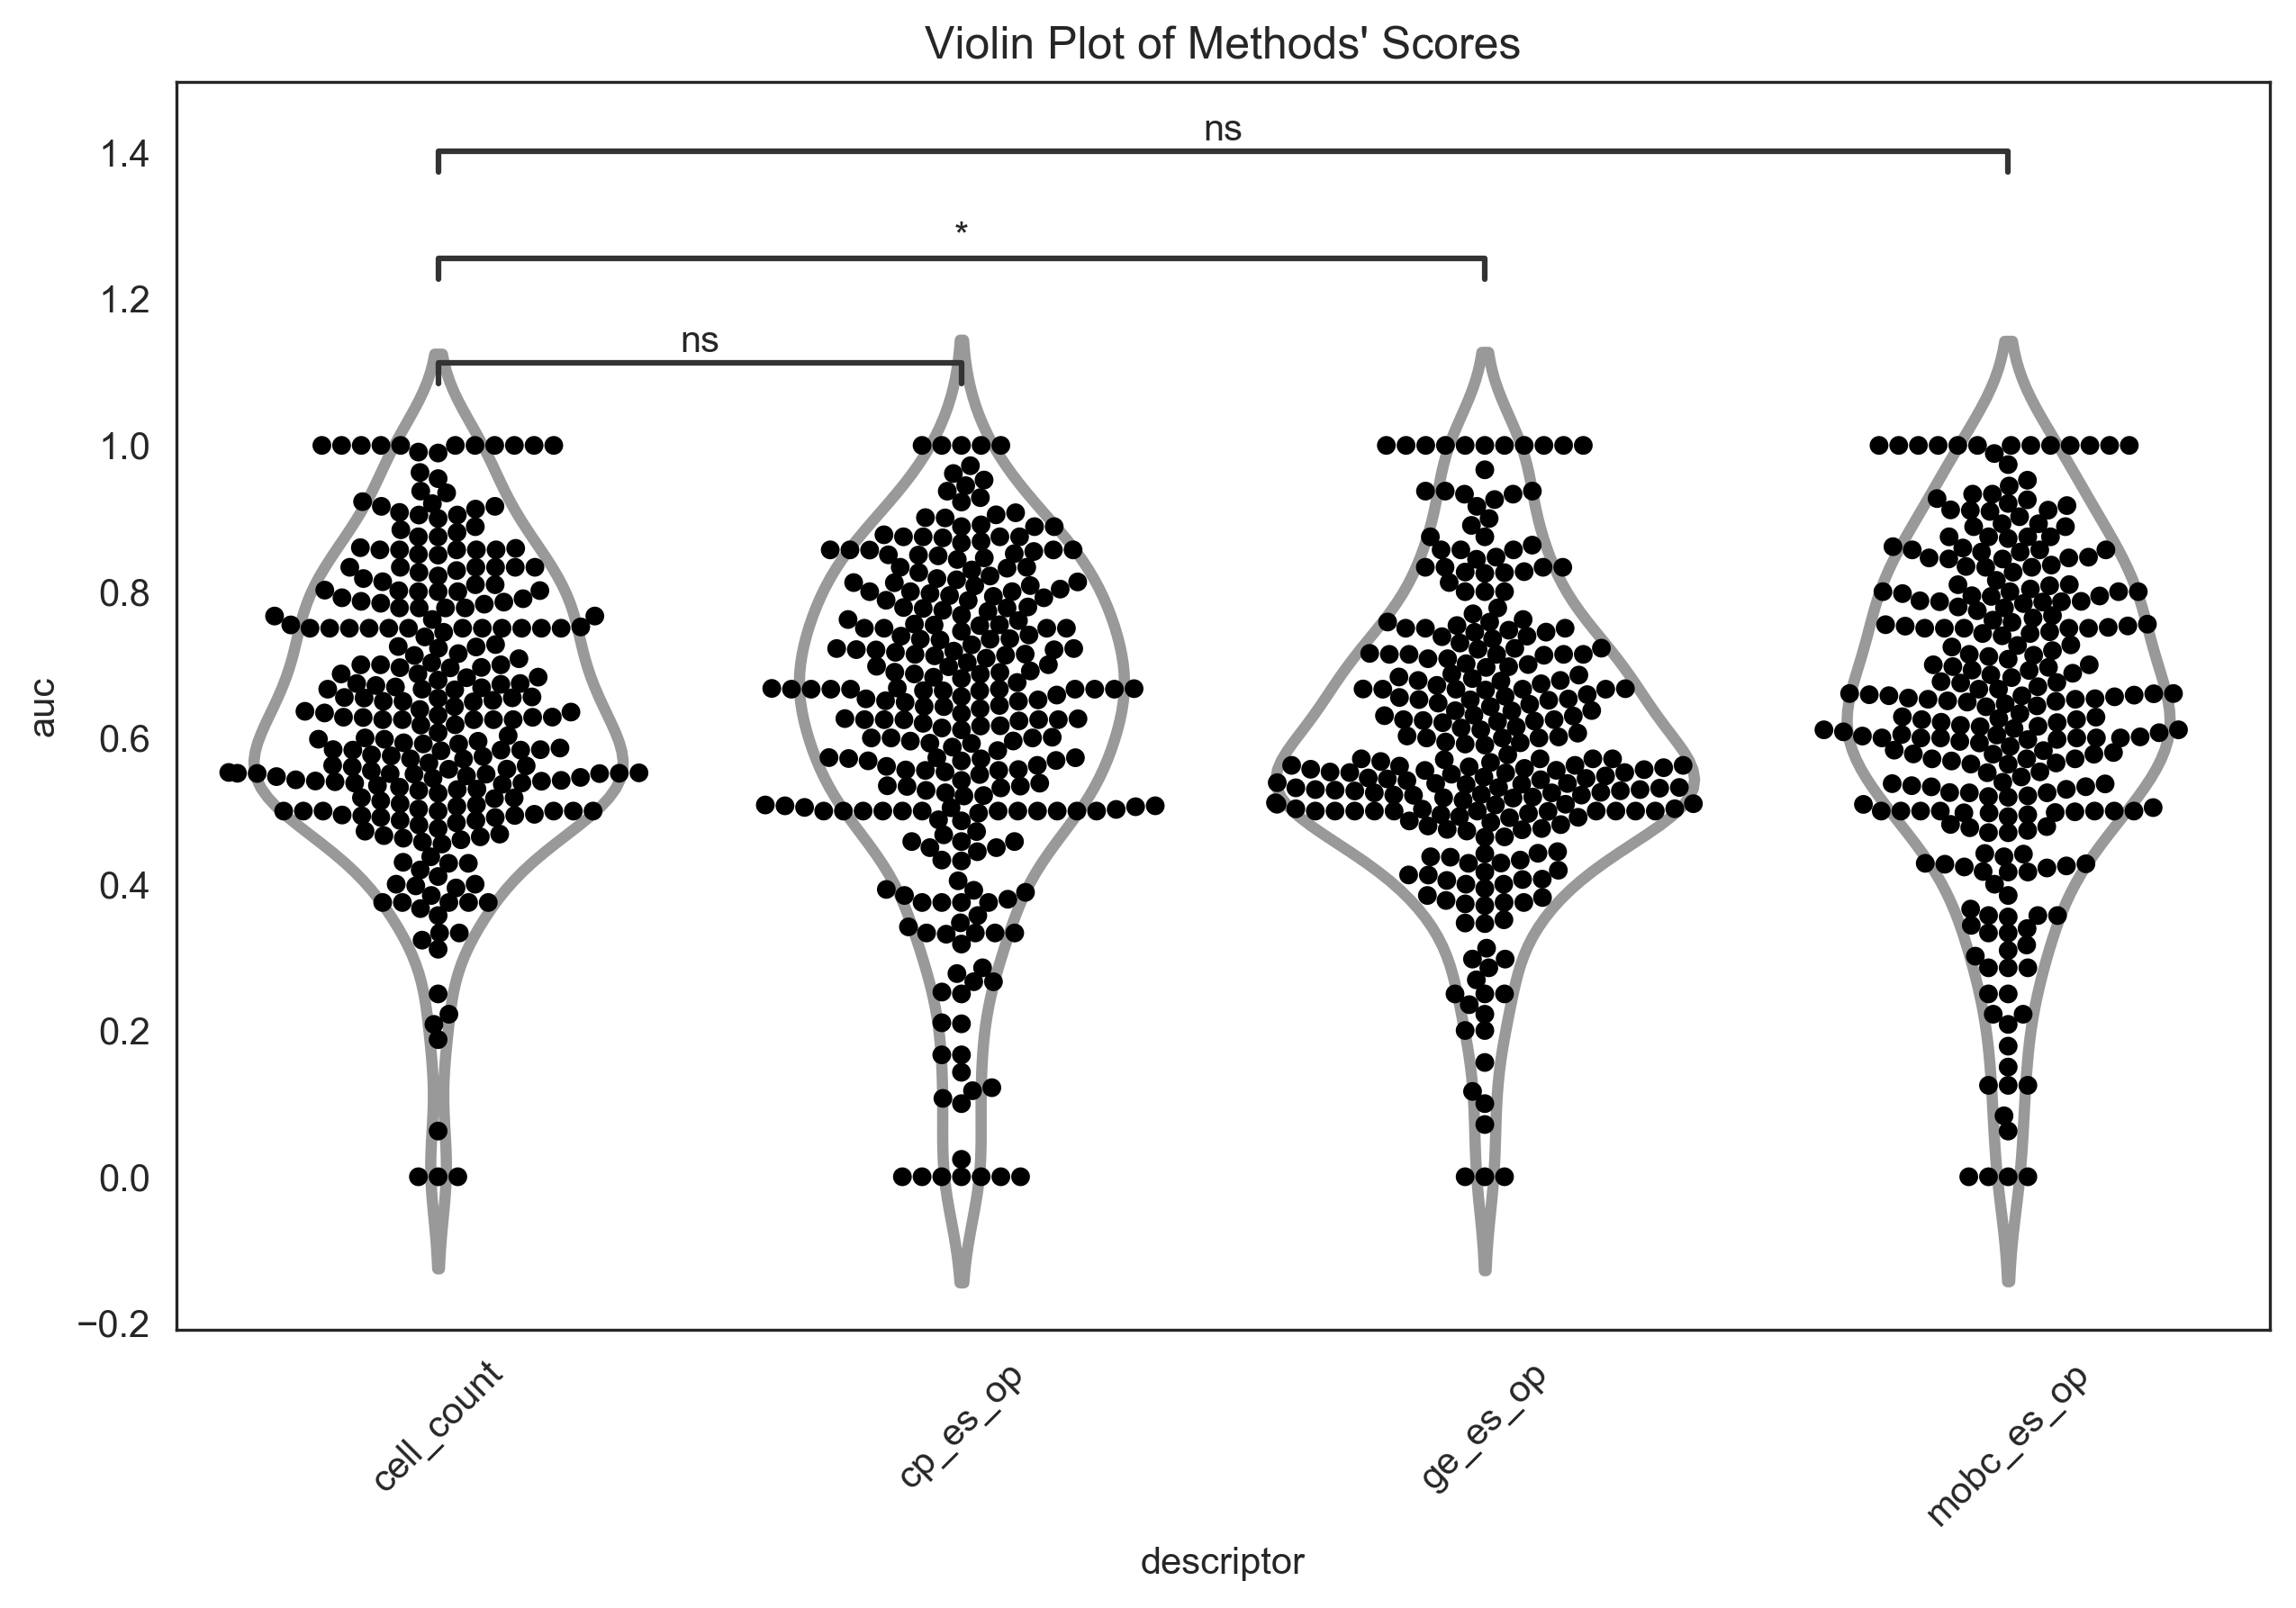

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation


melted_df_selected = filtered_df[filtered_df.descriptor.isin(['cell_count', 'mobc_es_op', 'ge_es_op', 'cp_es_op'])]
# melted_df_selected.loc[melted_df_selected['auc'] < 0.50, 'auc'] = 0.50

# Set plot background to white
sns.set_style("white")

# Assuming 'melted_df' is your dataframe
plt.figure(figsize=(10, 6), dpi=300)

# Create the violin plot
sns.violinplot(x="descriptor", y="auc", data=melted_df_selected, inner=None,  linewidth=3, color="white", edgecolor="black")

# Add the swarm plot with smaller dots
sns.swarmplot(x="descriptor", y="auc", data=melted_df_selected, color="k", alpha=1, size=5)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Set the title of the plot
plt.title("Violin Plot of Methods' Scores")

# Add statistical annotations
add_stat_annotation(plt.gca(), data=melted_df_selected, x="descriptor", y="auc",
                    box_pairs=[("cell_count", "mobc_es_op"), ("cell_count", "ge_es_op"), ("cell_count", "cp_es_op")],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

# Display the plot
plt.show()


In [157]:
melted_df_selected.groupby("descriptor").mean()

auc    auc_50    auc_70    auc_90     auc_1    auc_80
descriptor                                                            
cell_count  0.642261  0.782443  0.366412  0.095420  0.041985  0.225191
cp_es_op    0.617689  0.740458  0.389313  0.061069  0.019084  0.217557
ge_es_op    0.594222  0.717557  0.270992  0.072519  0.041985  0.156489
mobc_es_op  0.636604  0.751908  0.389313  0.106870  0.049618  0.240458

In [143]:
import pandas as pd
from matplotlib import pyplot as plt
from venn import venn

<Figure size 900x900 with 0 Axes>

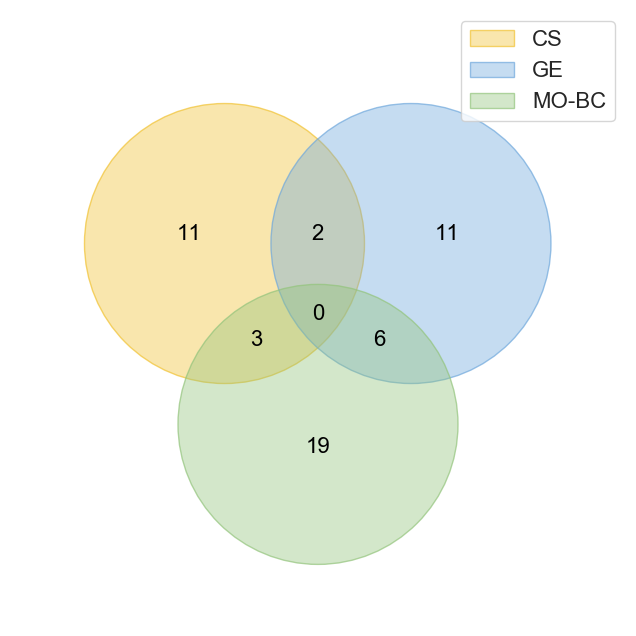

In [144]:


# Assuming 'results' is your DataFrame
# Filtering the DataFrame based on the given criteria
cs = df_dataset[(df_dataset['descriptor'] == 'cp_es_op') & (df_dataset['auc_90'] == True)]
ge = df_dataset[(df_dataset['descriptor'] == 'ge_es_op') & (df_dataset['auc_90'] == True)]
mo = df_dataset[(df_dataset['descriptor'] == 'mobc_es_op') & (df_dataset['auc_90'] == True)]

# Creating sets from the filtered DataFrame
set1 = set(cs['assay_id'])
set2 = set(ge['assay_id'])
set3 = set(mo['assay_id'])

# Creating a dictionary of sets for the Venn diagram
dict_set = {'CS': set1, 'GE': set2, 'MO-BC': set3}

# Define color map for the Venn diagram
cmap = ["#F1C232", "#6FA8DC", "#93C47C"]

# Plotting the Venn diagram
plt.figure(figsize=(9,9))
venn(dict_set, cmap=cmap, fontsize=16)
plt.show()


<Figure size 900x900 with 0 Axes>

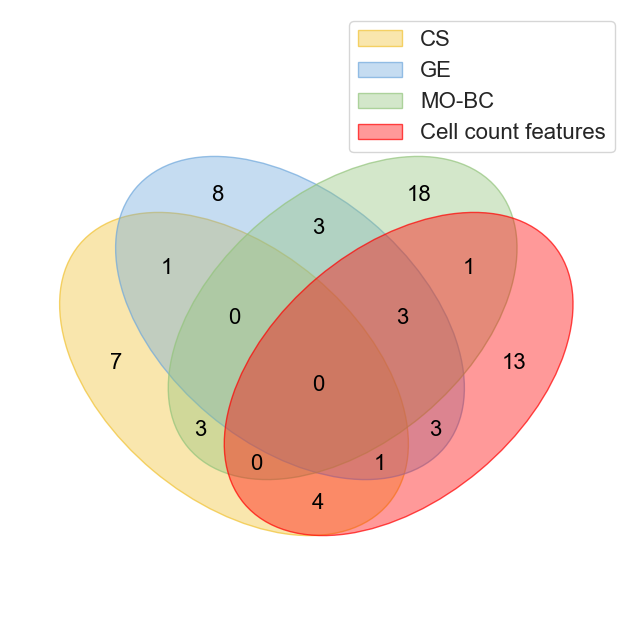

In [145]:


# Assuming 'results' is your DataFrame
# Filtering the DataFrame based on the given criteria
cs = df_dataset[(df_dataset['descriptor'] == 'cp_es_op') & (df_dataset['auc_90'] == True)]
ge = df_dataset[(df_dataset['descriptor'] == 'ge_es_op') & (df_dataset['auc_90'] == True)]
mo = df_dataset[(df_dataset['descriptor'] == 'mobc_es_op') & (df_dataset['auc_90'] == True)]
count = df_dataset[(df_dataset['descriptor'] == 'cell_count') & (df_dataset['auc_90'] == True)]

# Creating sets from the filtered DataFrame
set1 = set(cs['assay_id'])
set2 = set(ge['assay_id'])
set3 = set(mo['assay_id'])
set4 = set(count['assay_id'])

# Creating a dictionary of sets for the Venn diagram
dict_set = {'CS': set1, 'GE': set2, 'MO-BC': set3, 'Cell count features': set4}

# Define color map for the Venn diagram
cmap = ["#F1C232", "#6FA8DC", "#93C47C", "red"]

# Plotting the Venn diagram
plt.figure(figsize=(9,9))
venn(dict_set, cmap=cmap, fontsize=16)
plt.show()


In [146]:
# Find the intersection
common_elements = set3.intersection(set4)
# Print the result
print("Common elements:", common_elements)

Common elements: {'18_29', '111_402', '104_323', '104_299'}


<Figure size 2700x2700 with 0 Axes>

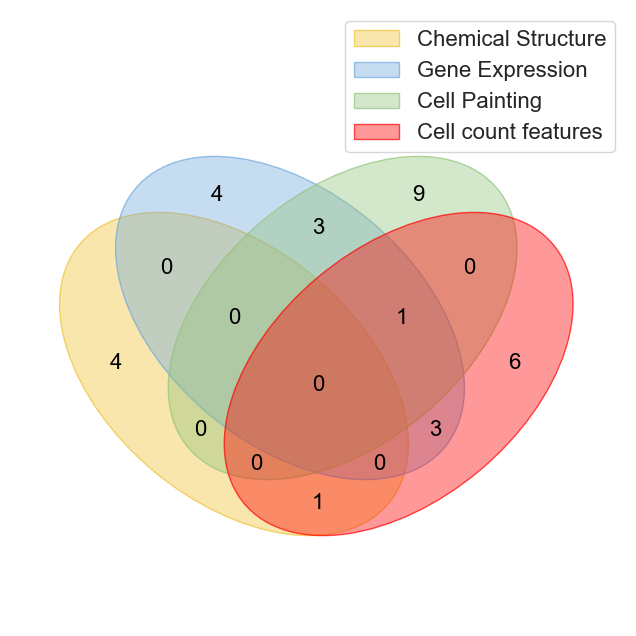

In [147]:


# Assuming 'results' is your DataFrame
# Filtering the DataFrame based on the given criteria
cs = df_dataset[(df_dataset['descriptor'] == 'cp_es_op') & (df_dataset['auc_1'] == True)]
ge = df_dataset[(df_dataset['descriptor'] == 'ge_es_op') & (df_dataset['auc_1'] == True)]
mo = df_dataset[(df_dataset['descriptor'] == 'mobc_es_op') & (df_dataset['auc_1'] == True)]
count = df_dataset[(df_dataset['descriptor'] == 'cell_count') & (df_dataset['auc_1'] == True)]

# Creating sets from the filtered DataFrame
set1 = set(cs['assay_id'])
set2 = set(ge['assay_id'])
set3 = set(mo['assay_id'])
set4 = set(count['assay_id'])

# Creating a dictionary of sets for the Venn diagram
dict_set = {'Chemical Structure': set1, 'Gene Expression': set2, 'Cell Painting': set3, 'Cell count features': set4}

# Define color map for the Venn diagram
cmap = ["#F1C232", "#6FA8DC", "#93C47C", "red"]

# Plotting the Venn diagram
plt.figure(figsize=(9,9), dpi=300)
venn(dict_set, cmap=cmap, fontsize=16)
plt.show()


<Figure size 900x900 with 0 Axes>

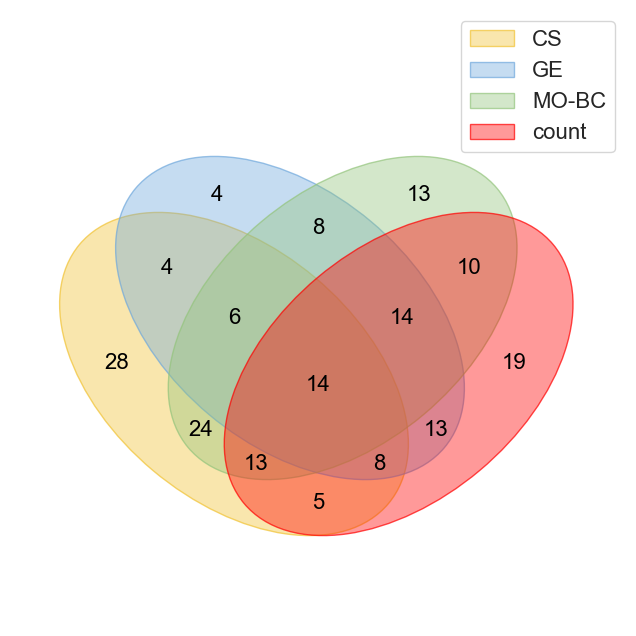

In [148]:


# Assuming 'results' is your DataFrame
# Filtering the DataFrame based on the given criteria
cs = df_dataset[(df_dataset['descriptor'] == 'cp_es_op') & (df_dataset['auc_70'] == True)]
ge = df_dataset[(df_dataset['descriptor'] == 'ge_es_op') & (df_dataset['auc_70'] == True)]
mo = df_dataset[(df_dataset['descriptor'] == 'mobc_es_op') & (df_dataset['auc_70'] == True)]
count = df_dataset[(df_dataset['descriptor'] == 'cell_count') & (df_dataset['auc_70'] == True)]

# Creating sets from the filtered DataFrame
set1 = set(cs['assay_id'])
set2 = set(ge['assay_id'])
set3 = set(mo['assay_id'])
set4 = set(count['assay_id'])

# Creating a dictionary of sets for the Venn diagram
dict_set = {'CS': set1, 'GE': set2, 'MO-BC': set3, 'count': set4}

# Define color map for the Venn diagram
cmap = ["#F1C232", "#6FA8DC", "#93C47C", "red"]

# Plotting the Venn diagram
plt.figure(figsize=(9,9))
venn(dict_set, cmap=cmap, fontsize=16)
plt.show()


<Figure size 900x900 with 0 Axes>

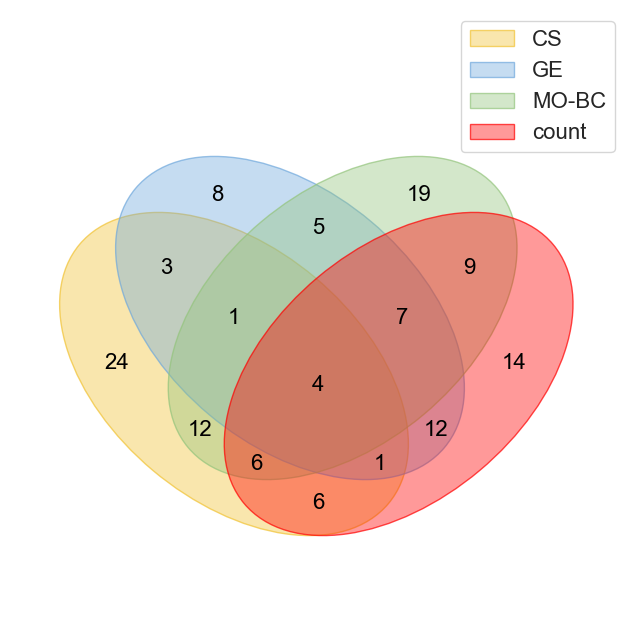

In [149]:


# Assuming 'results' is your DataFrame
# Filtering the DataFrame based on the given criteria
cs = df_dataset[(df_dataset['descriptor'] == 'cp_es_op') & (df_dataset['auc_80'] == True)]
ge = df_dataset[(df_dataset['descriptor'] == 'ge_es_op') & (df_dataset['auc_80'] == True)]
mo = df_dataset[(df_dataset['descriptor'] == 'mobc_es_op') & (df_dataset['auc_80'] == True)]
count = df_dataset[(df_dataset['descriptor'] == 'cell_count') & (df_dataset['auc_80'] == True)]

# Creating sets from the filtered DataFrame
set1 = set(cs['assay_id'])
set2 = set(ge['assay_id'])
set3 = set(mo['assay_id'])
set4 = set(count['assay_id'])

# Creating a dictionary of sets for the Venn diagram
dict_set = {'CS': set1, 'GE': set2, 'MO-BC': set3, 'count': set4}

# Define color map for the Venn diagram
cmap = ["#F1C232", "#6FA8DC", "#93C47C", "red"]

# Plotting the Venn diagram
plt.figure(figsize=(9,9))
venn(dict_set, cmap=cmap, fontsize=16)
plt.show()


<Figure size 900x900 with 0 Axes>

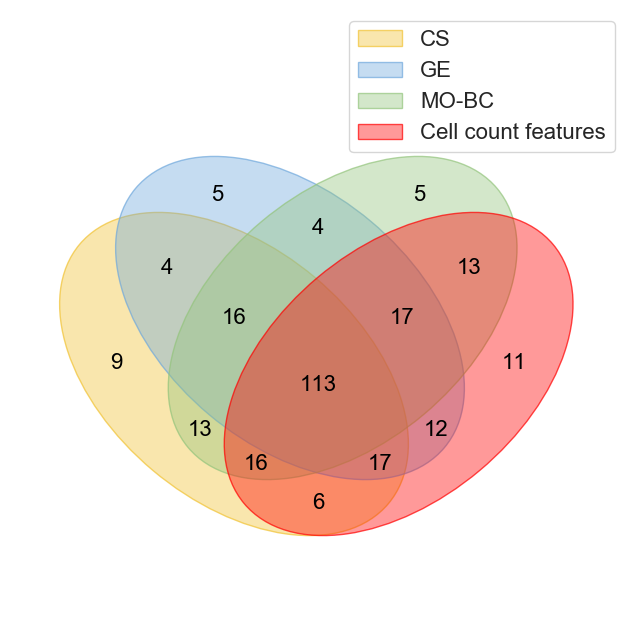

In [150]:


# Assuming 'results' is your DataFrame
# Filtering the DataFrame based on the given criteria
cs = df_dataset[(df_dataset['descriptor'] == 'cp_es_op') & (df_dataset['auc_50'] == True)]
ge = df_dataset[(df_dataset['descriptor'] == 'ge_es_op') & (df_dataset['auc_50'] == True)]
mo = df_dataset[(df_dataset['descriptor'] == 'mobc_es_op') & (df_dataset['auc_50'] == True)]
count = df_dataset[(df_dataset['descriptor'] == 'cell_count') & (df_dataset['auc_50'] == True)]

# Creating sets from the filtered DataFrame
set1 = set(cs['assay_id'])
set2 = set(ge['assay_id'])
set3 = set(mo['assay_id'])
set4 = set(count['assay_id'])

# Creating a dictionary of sets for the Venn diagram
dict_set = {'CS': set1, 'GE': set2, 'MO-BC': set3, 'Cell count features': set4}

# Define color map for the Venn diagram
cmap = ["#F1C232", "#6FA8DC", "#93C47C", "red"]

# Plotting the Venn diagram
plt.figure(figsize=(9,9))
venn(dict_set, cmap=cmap, fontsize=16)
plt.show()
